In [32]:
import sympy as sp

# Define variables
s = sp.symbols('s')
omega_0, J, l = sp.symbols('omega_0 J l', real=True)

# Desired transfer function
desired_tf = omega_0**2 / (s + omega_0)**2

# Open-loop transfer function (G(s))
G_s = l / (J * s**2)

# Regulator terms F(s) and K(s)
F_s = sp.symbols('F_s')
K_s = sp.symbols('K_s')

# Closed-loop transfer function
closed_loop_tf = (l * F_s) / (J * s**2 + l * K_s)

# Solve for F(s) and K(s) by matching numerator and denominator
numerator_eq = sp.Eq(l * F_s, omega_0**2)
# denominator_eq = sp.Eq(J * s**2 + l * K_s, s**2 + 2 * omega_0 * s + omega_0**2)
denominator_eq = sp.Eq(J * s**2 + l * K_s, (s + omega_0)**2)

# Solve the system of equations
solutions = sp.solve([numerator_eq, denominator_eq], [F_s, K_s])

display(solutions[F_s], solutions[K_s])

omega_0**2/l

(-J*s**2 + omega_0**2 + 2*omega_0*s + s**2)/l

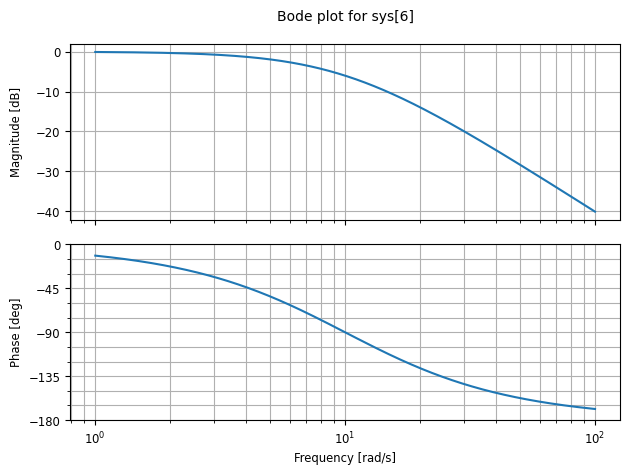

In [33]:
import control as ctrl
import matplotlib.pyplot as plt

# Define system parameters
omega_0 = 10

# Transfer function: G(s) = omega_0^2 / (s + omega_0)^2
num = [omega_0**2]  # Numerator
den = [1, 2*omega_0, omega_0**2]  # Denominator (expanded)

# Create transfer function system
sys = ctrl.TransferFunction(num, den)

# Plot the Bode plot
ctrl.bode_plot(sys, dB=True)

# Show the plots
plt.show()


/home/fredrik/Projects/Education/NTNU/24-25/TTK4111_Reguleringsteknikk_2024_HOST/.venv/lib/python3.12/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


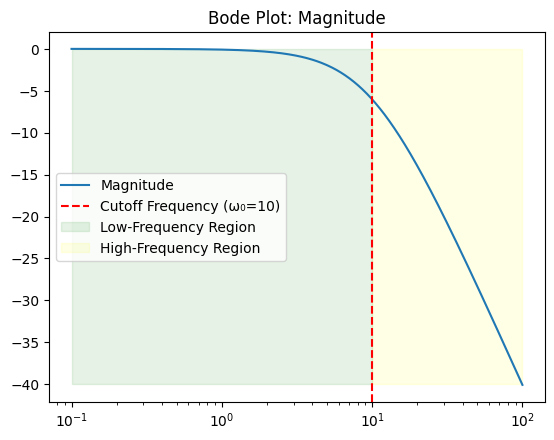

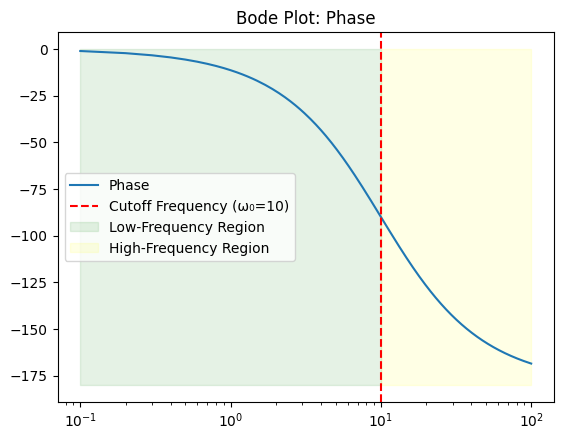

In [34]:
import control as ctrl
import matplotlib.pyplot as plt
import numpy as np

# Define system parameters
omega_0 = 10

# Transfer function: G(s) = omega_0^2 / (s + omega_0)^2
num = [omega_0**2]  # Numerator
den = [1, 2*omega_0, omega_0**2]  # Denominator (expanded form)

# Create transfer function system
sys = ctrl.TransferFunction(num, den)

# Get the magnitude, phase, and frequency
omega = np.linspace(0.1, 100, 1000)  # Define frequency range for analysis
mag, phase, omega = ctrl.bode(sys, omega, dB=True, Hz=False, plot=False)

# Now manually plot using matplotlib
plt.figure()
plt.semilogx(omega, 20 * np.log10(mag), label='Magnitude')
plt.axvline(x=omega_0, color='red', linestyle='--', label=f'Cutoff Frequency (ω₀={omega_0})')
plt.fill_betweenx([-40, 0], 0.1, omega_0, color='green', alpha=0.1, label='Low-Frequency Region')
plt.fill_betweenx([-40, 0], omega_0, max(omega), color='yellow', alpha=0.1, label='High-Frequency Region')
plt.legend(loc='best')
plt.title("Bode Plot: Magnitude")

plt.figure()
plt.semilogx(omega, phase * (180 / np.pi), label='Phase')
plt.axvline(x=omega_0, color='red', linestyle='--', label=f'Cutoff Frequency (ω₀={omega_0})')
plt.fill_betweenx([-180, 0], 0.1, omega_0, color='green', alpha=0.1, label='Low-Frequency Region')
plt.fill_betweenx([-180, 0], omega_0, max(omega), color='yellow', alpha=0.1, label='High-Frequency Region')
plt.legend(loc='best')
plt.title("Bode Plot: Phase")

plt.show()

In [40]:

T = sp.symbols('T', real=True)

# Define the expression
expr = J * s**2 * ( T * s + 1) + l * K_s

# Substitute K_s with its solution
simplified_expr = expr.subs(K_s, solutions[K_s])

simplified_expr_simplified = sp.simplify(simplified_expr)

simplified_expr_simplified

T*s**3 + omega_0**2 + 2*omega_0*s + s**2